NumPy Version: 1.16.0
Pandas Version: 0.23.4
Matplotlib Version: 3.0.2
Seaborn Version: 0.8.1


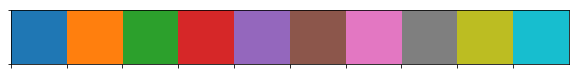

In [1]:
import numpy as np
print("NumPy Version: {}".format(np.__version__))
import pandas as pd
print("Pandas Version: {}".format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("Matplotlib Version: {}".format(matplotlib.__version__))
import seaborn as sns
print("Seaborn Version: {}".format(sns.__version__))

%matplotlib inline

color = sns.color_palette()
sns.palplot(color)

In [2]:
# EDA
train_df = pd.read_csv("train_2016_v2.csv")
print("Number of rows: {}".format(train_df.shape[0]))
print("Number of cols: {}".format(train_df.shape[1]))
print('-'*30)
print(train_df.head())
print('-'*30)
print(train_df.describe())
print('-'*30)
print("Missing values:\n", train_df.isnull().sum())

Number of rows: 90275
Number of cols: 3
------------------------------
   parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02
------------------------------
           parcelid      logerror
count  9.027500e+04  90275.000000
mean   1.298466e+07      0.011457
std    2.504510e+06      0.161079
min    1.071174e+07     -4.605000
25%    1.155950e+07     -0.025300
50%    1.254734e+07      0.006000
75%    1.422755e+07      0.039200
max    1.629608e+08      4.737000
------------------------------
Missing values:
 parcelid           0
logerror           0
transactiondate    0
dtype: int64


In [3]:
train_df.isnull().sum()

parcelid           0
logerror           0
transactiondate    0
dtype: int64

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


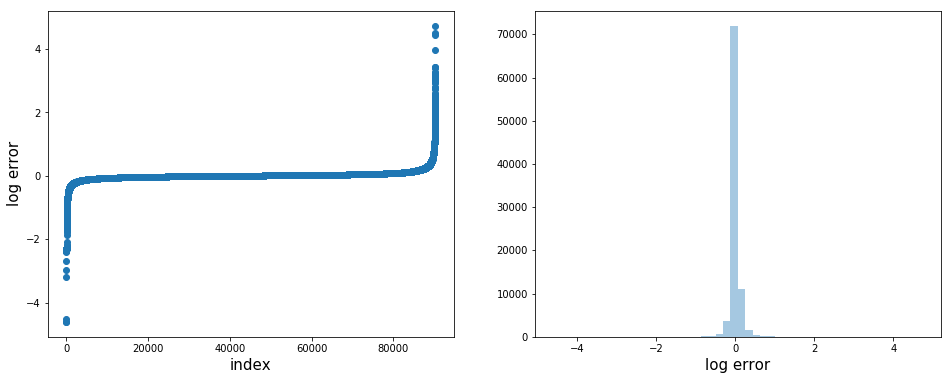

In [4]:
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.scatter(range(train_df.shape[0]), np.sort(train_df.logerror))
plt.xlabel('index', fontsize=15)
plt.ylabel('log error', fontsize=15)

plt.subplot(122)
sns.distplot(train_df.logerror, bins=50, kde=False)
plt.xlabel('log error', fontsize=15)

plt.show()

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


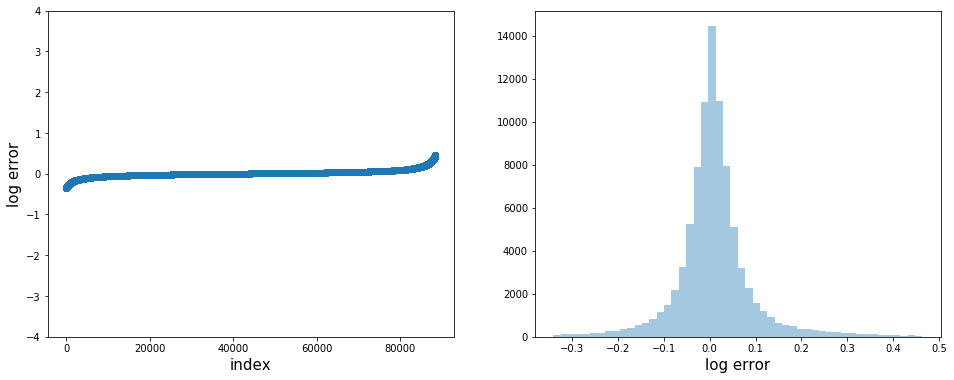

In [5]:
# we can see there are outliers on both ends
# removing outliers
train_df_copy = train_df.copy()
upper_bound = np.percentile(train_df_copy.logerror, 99)
lower_bound = np.percentile(train_df_copy.logerror, 1)
train_df_copy = train_df_copy.loc[(train_df_copy.logerror > lower_bound) & (train_df_copy.logerror < upper_bound)]

# again plot the same graphs
plt.figure(figsize=(16,6))

plt.subplot(121)
plt.scatter(range(train_df_copy.shape[0]), np.sort(train_df_copy.logerror))
plt.xlabel('index', fontsize=15)
plt.ylabel('log error', fontsize=15)
plt.ylim([-4,4])

plt.subplot(122)
sns.distplot(train_df_copy.logerror, bins=50, kde=False)
plt.xlabel('log error', fontsize=15)

plt.show()

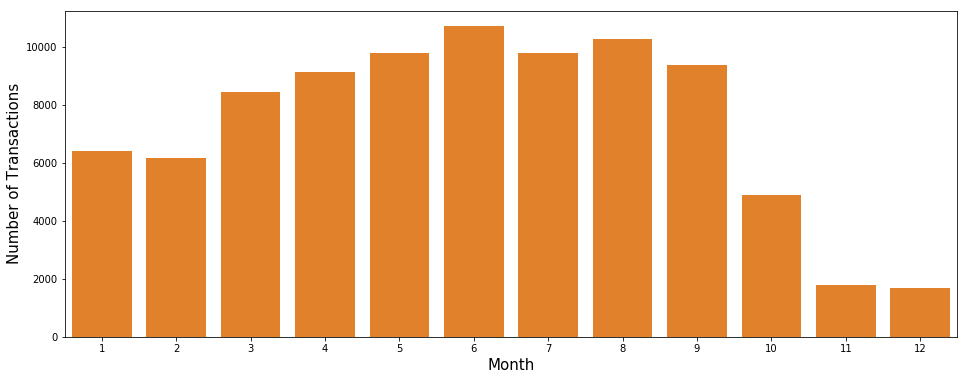

In [6]:
# explore the transaction date
train_df_copy.transactiondate = pd.to_datetime(train_df_copy.transactiondate)
train_df_copy['month'] = train_df_copy.transactiondate.dt.month
cnt_by_month = train_df_copy['month'].value_counts()

plt.figure(figsize=(16,6))

sns.barplot(cnt_by_month.index, cnt_by_month.values, color=color[1])
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Transactions", fontsize=15)
plt.show()

In [7]:
train_df_copy['parcelid'].value_counts().reset_index()['parcelid'].value_counts()

1    88228
2      117
3        1
Name: parcelid, dtype: int64

In [8]:
# EDA on properties
prop_df = pd.read_csv("properties_2016.csv")
print("Number of rows: {}".format(prop_df.shape[0]))
print("Number of cols: {}".format(prop_df.shape[1]))
print('-'*30)
prop_df.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Number of rows: 2985217
Number of cols: 58
------------------------------


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


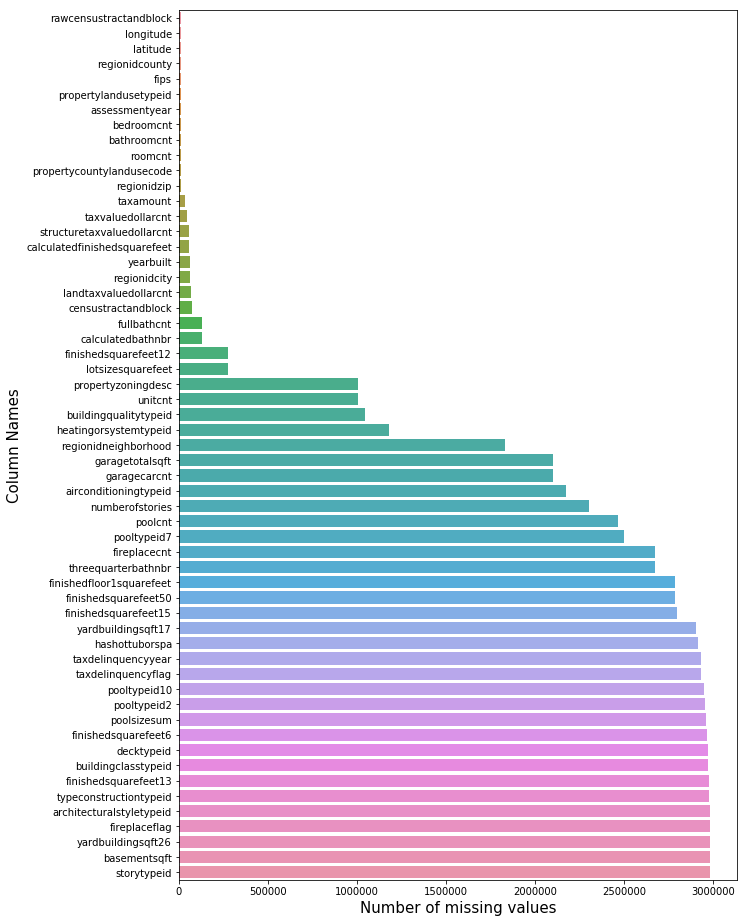

In [9]:
# missing values
missing_df = prop_df.isnull().sum().reset_index()
missing_df.columns = ['col_name', 'missing_count']
missing_df = missing_df.loc[missing_df.missing_count > 0]
missing_df = missing_df.sort_values(by='missing_count')

plt.figure(figsize=(10,16))

sns.barplot(x=missing_df.missing_count.values, y=missing_df.col_name.values)
plt.xlabel('Number of missing values', fontsize=15)
plt.ylabel('Column Names', fontsize=15)
plt.show()

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


<Figure size 864x864 with 0 Axes>

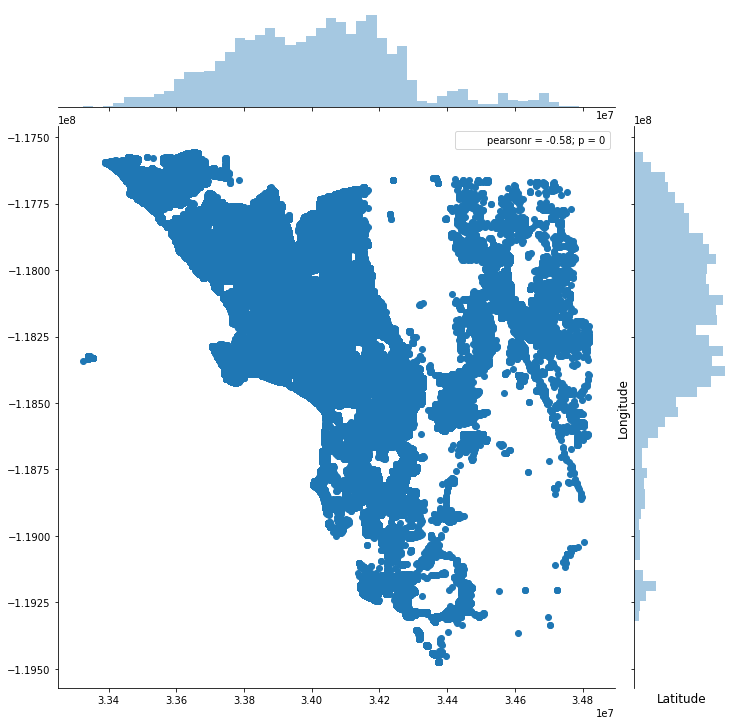

In [10]:
plt.figure(figsize=(12,12))

sns.jointplot(x=prop_df.latitude.values, y=prop_df.longitude.values, size=10)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Longitude', fontsize=12)
plt.show()

In [11]:
# join the two tables together
# test to see if parcelid in properties is a unique identifier
prop_df.parcelid.value_counts().reset_index()['parcelid'].value_counts()

1    2985217
Name: parcelid, dtype: int64

In [12]:
# joining the two tables together using parcelid

train_df_copy = pd.merge(train_df_copy, prop_df, on='parcelid', how='left')
train_df_copy.head()

,parcelid,logerror,transactiondate,month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1.0,NaN,NaN,2.0,3.0,NaN,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1,1.0,NaN,NaN,3.0,2.0,NaN,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1,1.0,NaN,NaN,2.0,2.0,NaN,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,NaN,NaN,NaN,2.5,4.0,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [13]:
# check data types of each variable
pd.options.display.max_rows = 65

dtype_df = train_df_copy.dtypes.reset_index()
dtype_df.columns = ['Variable', 'Data Type']
dtype_df

,Variable,Data Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,month,int64
4,airconditioningtypeid,float64
5,architecturalstyletypeid,float64
6,basementsqft,float64
7,bathroomcnt,float64
8,bedroomcnt,float64
9,buildingclasstypeid,float64


In [14]:
# most are float data type
dtype_df.groupby("Data Type").count().reset_index()

,Data Type,Variable
0,int64,2
1,float64,53
2,datetime64[ns],1
3,object,5


In [15]:
missing_df = train_df_copy.isnull().sum(axis=0).reset_index()
missing_df.columns = ['col_name', 'count_missing']
missing_df['percent_missing'] = missing_df.count_missing / train_df_copy.shape[0]
missing_df.loc[missing_df.percent_missing > 0.999]

,col_name,count_missing,percent_missing
6,basementsqft,88424,0.999537
9,buildingclasstypeid,88453,0.999864
16,finishedsquarefeet13,88435,0.999661
44,storytypeid,88424,0.999537


D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


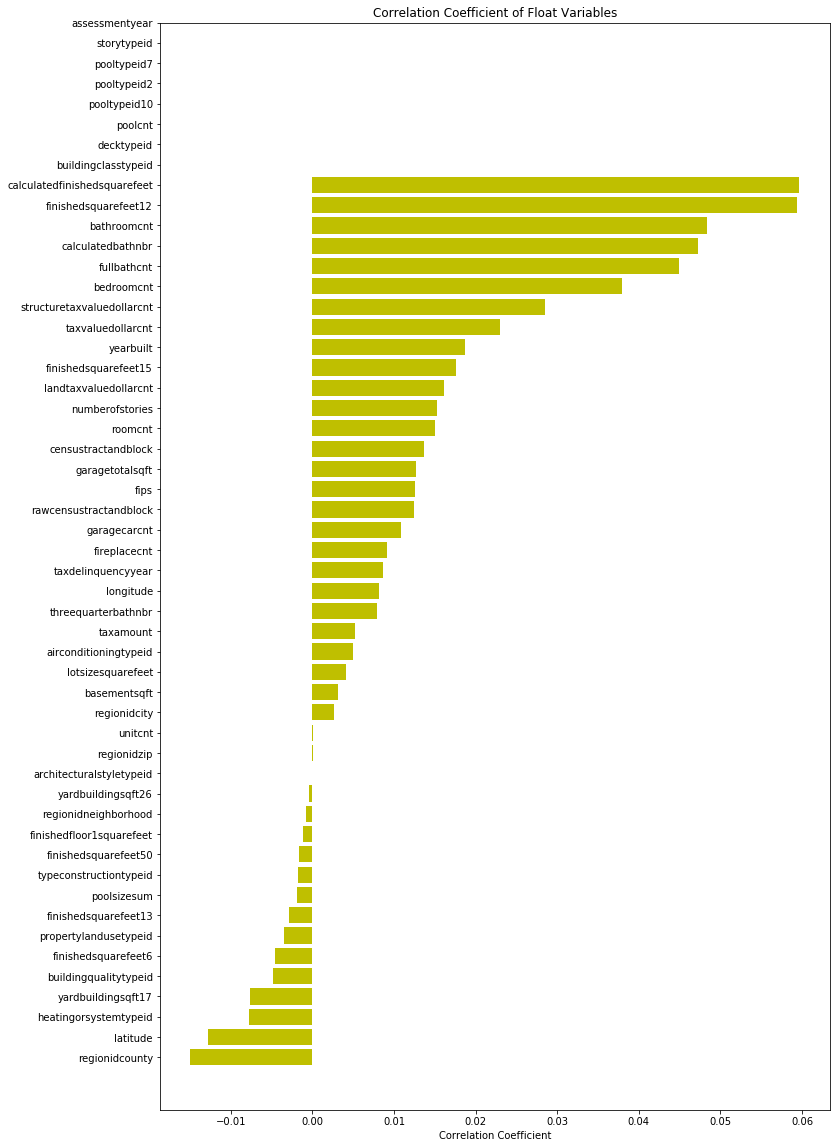

In [16]:
# impute the missing values with mean, in order to compute the correlation coefficients'

mean_values = train_df_copy.mean()
train_df_copy_new = train_df_copy.fillna(mean_values)
train_df_copy.fillna(mean_values, inplace=True)

# calculate correlation coefficient for each of these variables
x_cols = [col for col in train_df_copy_new.columns if col not in ['logerror'] if train_df_copy_new[col].dtype=='float64']
x_cols

labels = []
values = []

for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_copy_new[col].values, train_df_copy_new['logerror'].values)[0,1])

corr_df = pd.DataFrame({'col_labels': labels, 'corr_values': values})
corr_df = corr_df.sort_values(by='corr_values')

ind = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(12,20))

ax.barh(ind, corr_df.corr_values.values, color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values)
ax.set_xlabel("Correlation Coefficient")
ax.set_title("Correlation Coefficient of Float Variables")
plt.show()

In [17]:
# variables having NaN correlation coefficient have only one value
# Take the variables with high correlation coefficient values and do some analysis

In [18]:
corr_df_high = corr_df.loc[(corr_df['corr_values'] > 0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_high

,col_labels,corr_values
33,regionidcounty,-0.014949
22,latitude,-0.012802
46,taxvaluedollarcnt,0.022976
45,structuretaxvaluedollarcnt,0.028540
4,bedroomcnt,0.037918
18,fullbathcnt,0.044875
7,calculatedbathnbr,0.047295
3,bathroomcnt,0.048349
11,finishedsquarefeet12,0.059392
10,calculatedfinishedsquarefeet,0.059642


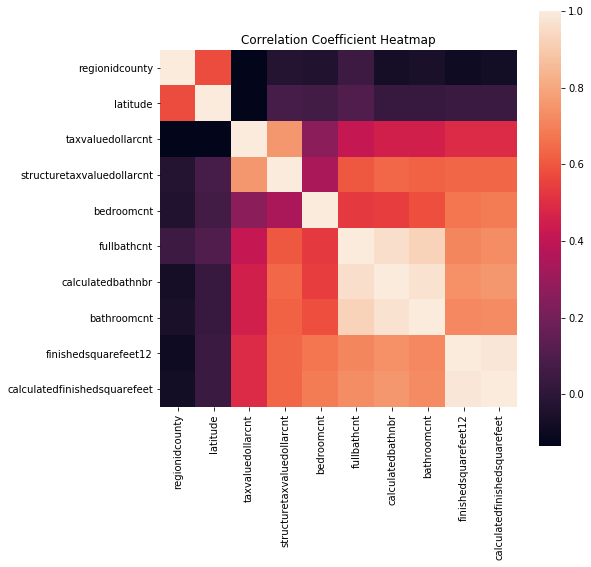

In [19]:
temp_df = train_df_copy[corr_df_high['col_labels'].values]
corrmat = temp_df.corr(method='spearman')
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Correlation Coefficient Heatmap")
plt.show()

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


<Figure size 864x864 with 0 Axes>

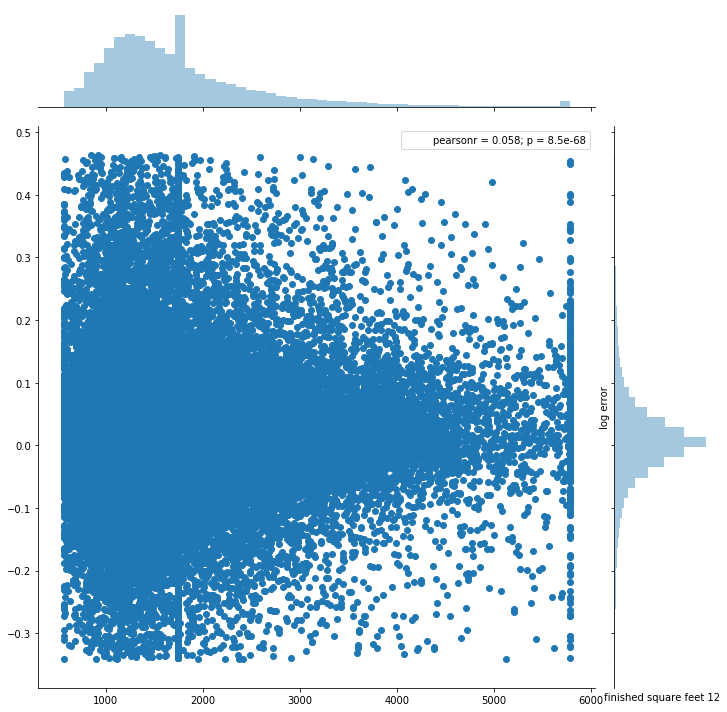

In [20]:
# finished square feet 12:

col = 'finishedsquarefeet12'

ulimit = np.percentile(train_df_copy[col].values, 99.5)
llimit = np.percentile(train_df_copy[col].values, 0.5)
train_df_copy[col].loc[train_df_copy[col] > ulimit] = ulimit
train_df_copy[col].loc[train_df_copy[col] < llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df_copy.finishedsquarefeet12.values, y=train_df_copy.logerror.values, size=10)
plt.ylabel('log error')
plt.xlabel('finished square feet 12')
plt.show()

In [21]:
# We can see that as finished square feet 12 gets bigger, the log error starts to get more condensed. Suggesting larger houses 
# are easier to predict. 

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


<Figure size 864x864 with 0 Axes>

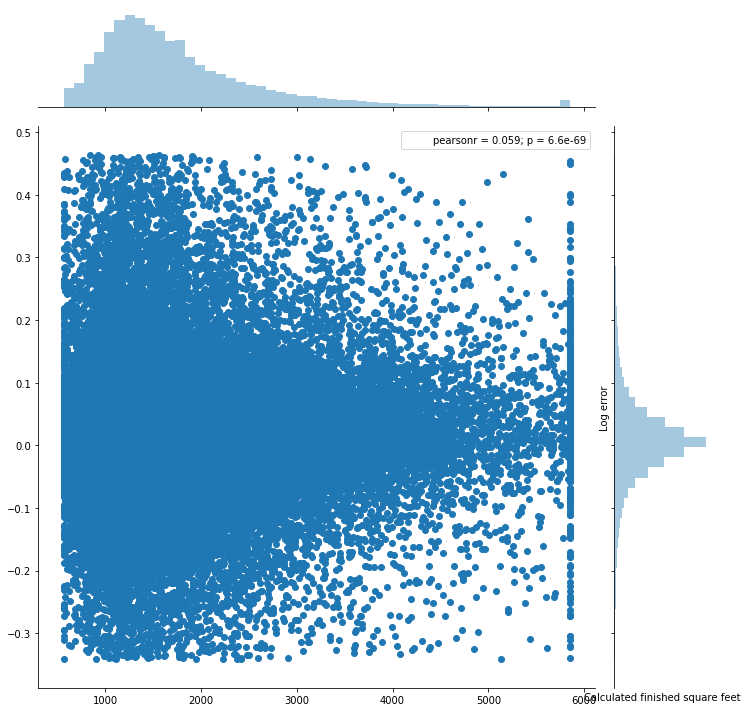

In [22]:
# now we look at calculated finished square feet

col = 'calculatedfinishedsquarefeet'
ulimit = np.percentile(train_df_copy[col].values, 99.5)
llimit = np.percentile(train_df_copy[col].values, 0.5)
train_df_copy[col].loc[train_df_copy[col] > ulimit] = ulimit
train_df_copy[col].loc[train_df_copy[col] < llimit] = llimit


plt.figure(figsize=(12,12))

sns.jointplot(x=train_df_copy.calculatedfinishedsquarefeet.values, y=train_df_copy.logerror.values, size=10)
plt.ylabel('Log error')
plt.xlabel('Calculated finished square feet')
plt.show()

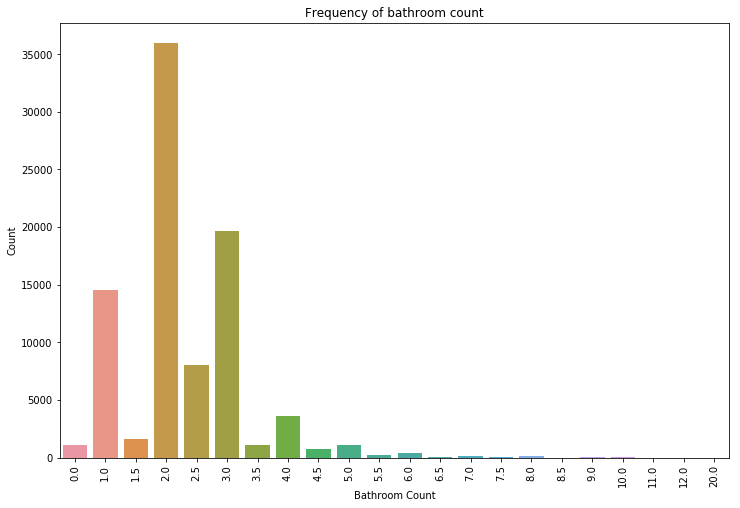

In [23]:
# bathroom count
plt.figure(figsize=(12,8))
sns.countplot(data=train_df_copy, x='bathroomcnt')
plt.ylabel('Count')
plt.xlabel('Bathroom Count')
plt.xticks(rotation='vertical')
plt.title('Frequency of bathroom count')
plt.show()

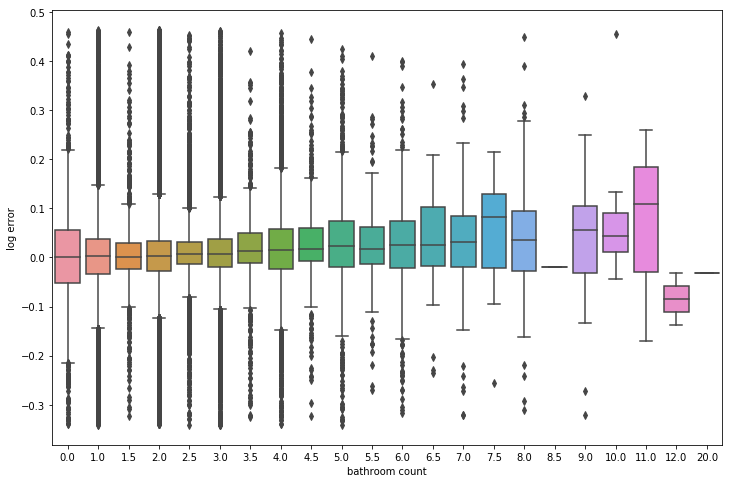

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train_df_copy, x='bathroomcnt', y='logerror')
plt.ylabel('log error')
plt.xlabel('bathroom count')
plt.show()

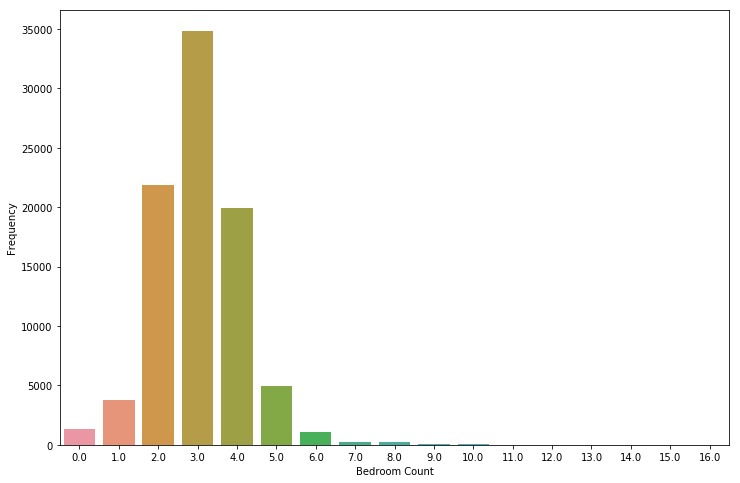

In [25]:
# bedroom count
plt.figure(figsize=(12,8))
sns.countplot(data=train_df_copy, x='bedroomcnt')
plt.ylabel('Frequency')
plt.xlabel('Bedroom Count')
plt.show()

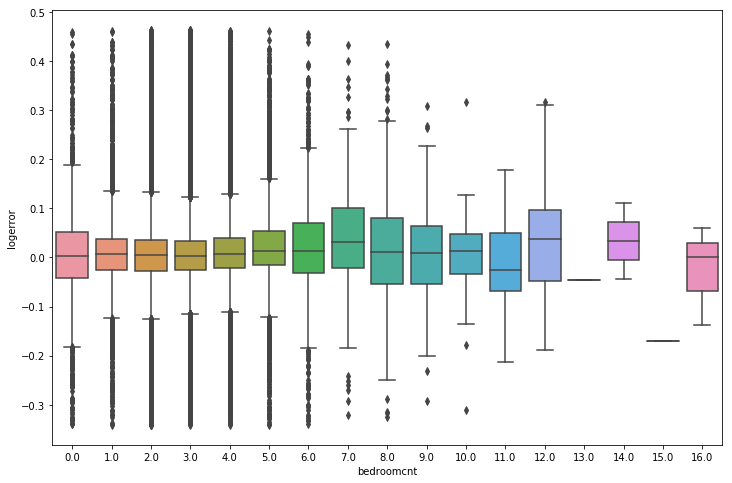

In [26]:
plt.figure(figsize=(12,8))
sns.boxplot(data=train_df_copy, x='bedroomcnt', y='logerror')
plt.show()

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


<Figure size 864x864 with 0 Axes>

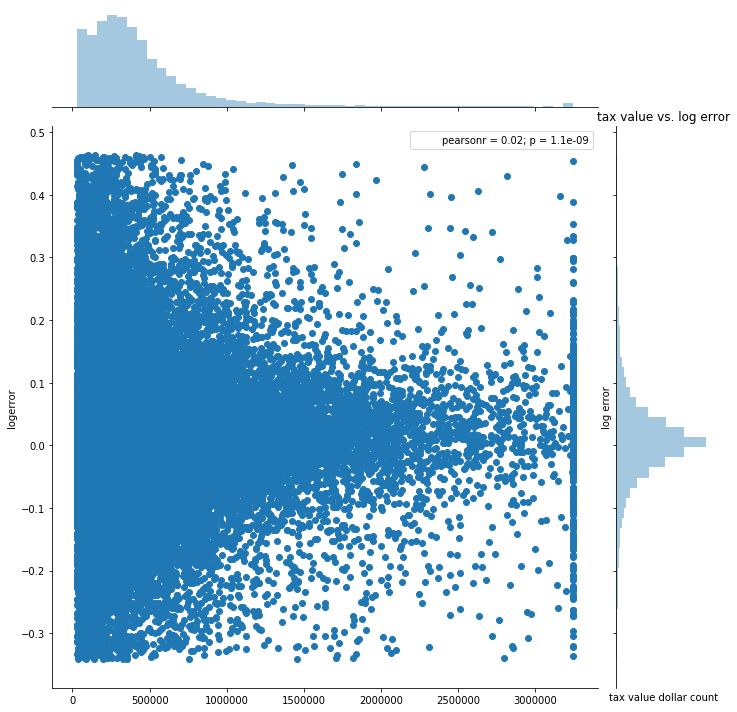

In [27]:
# taxvaluedollarcnt

col = 'taxvaluedollarcnt'
ulimit = np.percentile(train_df_copy[col].values, 99.5)
llimit = np.percentile(train_df_copy[col].values, 0.5)
train_df_copy[col].loc[train_df_copy[col] > ulimit] = ulimit
train_df_copy[col].loc[train_df_copy[col] < llimit] = llimit

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df_copy.taxvaluedollarcnt.values, y=train_df_copy.logerror, size=10)
plt.ylabel('log error')
plt.xlabel('tax value dollar count')
plt.title('tax value vs. log error')
plt.show()

In [28]:
# # Year Built
# from ggplot import *

# ggplot(aes(x='yearbuilt', y='logerror'), data=train_df_copy) + geom_point(color='steelblue', size=1) + stat_smooth()

In [29]:
train_y = train_df_copy['logerror'].values
cat_cols = dtype_df['Variable'].loc[dtype_df['Data Type'] == 'object'].values.tolist()
train_df_copy = train_df_copy.drop(cat_cols + ['parcelid', 'logerror', 'transactiondate', 'month'], axis=1)

In [30]:
feat_names = train_df_copy.columns.values
feat_names

array(['airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13',
       'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'heatingorsystemtypeid',
       'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt',
       'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt',
       'numberofstories', 'structuretaxvaluedollarcnt',
  

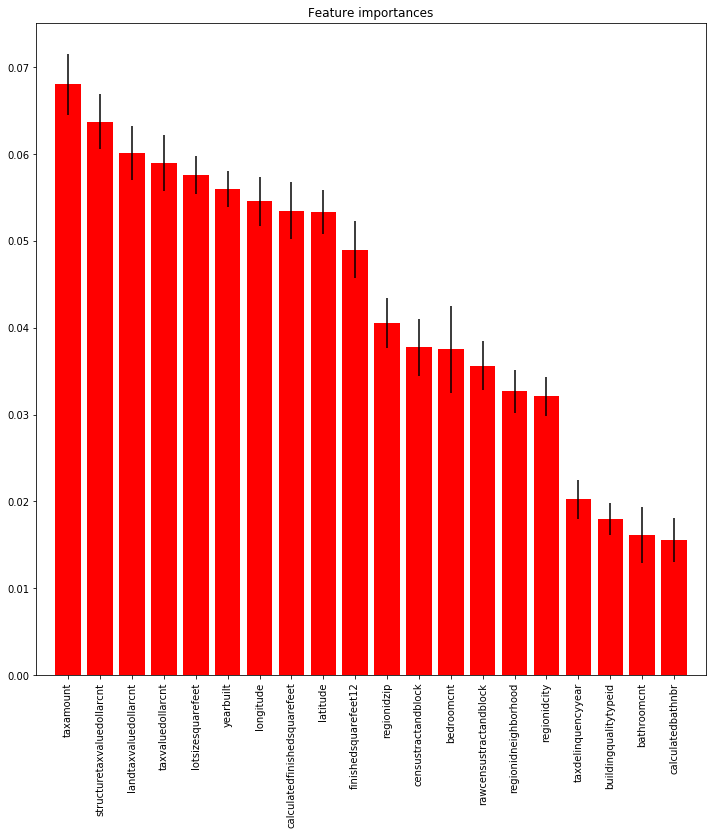

In [31]:
from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(train_df_copy, train_y)

# plot feature importance
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

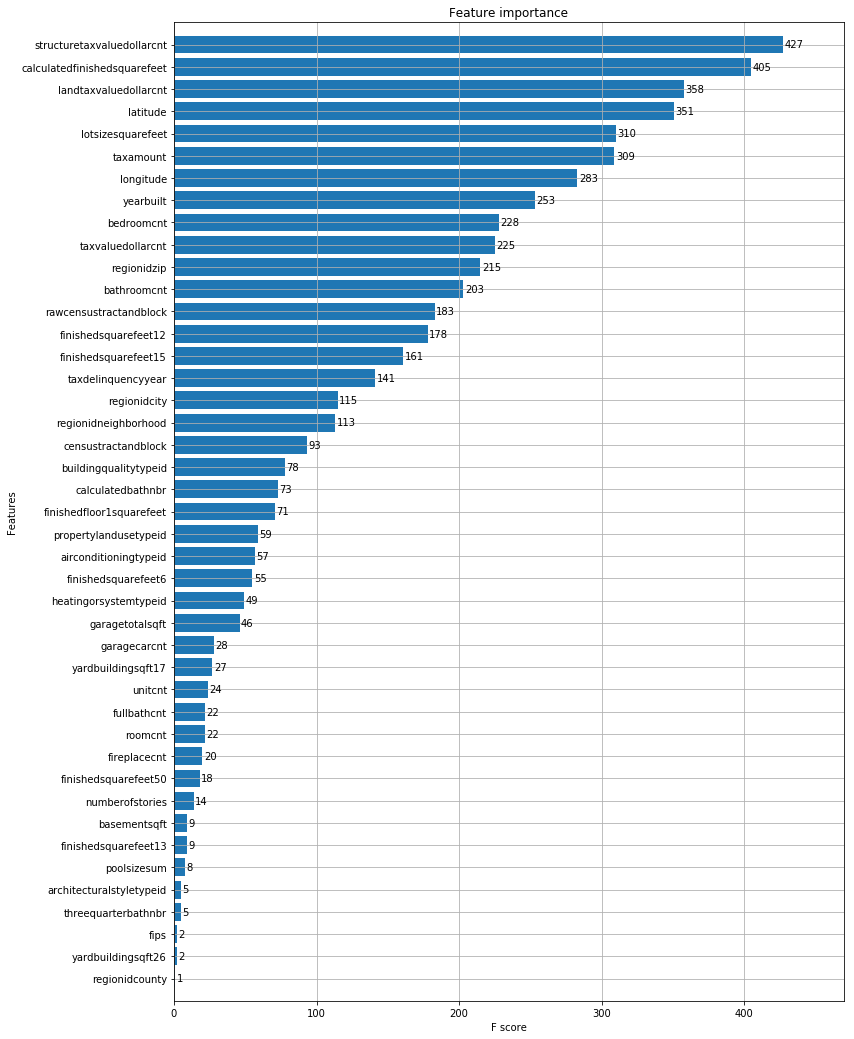

In [32]:
import xgboost as xgb

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}
dtrain = xgb.DMatrix(train_df_copy, train_y, feature_names=train_df_copy.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()